### **Problem 1 - Identify Categorical variables & Continuous Variables**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
emp_data = pd.read_csv('/content/employee_data.csv')

In [0]:
emp_data.columns

Index(['age', 'employment_type', 'salary', 'education', 'marital-status',
       'relationship', 'Gender', 'hours_per_week'],
      dtype='object')

In [0]:
emp_data.head()

,age,employment_type,salary,education,marital-status,relationship,Gender,hours_per_week
0,39,State-gov,77516,Bachelors,Never-married,Not-in-family,Male,40
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Husband,Male,13
2,38,Private,215646,HS-grad,Divorced,Not-in-family,Male,40
3,53,Private,234721,11th,Married-civ-spouse,Husband,Male,40
4,28,Private,338409,Bachelors,Married-civ-spouse,Wife,Female,40


***Categorical Variables in the dataset***

In [0]:
#Unique employment types
emp_data['employment_type'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc'], dtype=object)

In [0]:
#Different education fields
emp_data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [0]:
#Unique marital status
emp_data['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [0]:
#Different relationships
emp_data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [0]:
#Various Gender
emp_data['Gender'].unique()

array([' Male', ' Female'], dtype=object)

***Continuous Variables in the dataset***

In [0]:
len(emp_data['age'].unique())

65

In [0]:
len(emp_data['salary'].unique())

966

In [0]:
len(emp_data['hours_per_week'].unique())

56

### **Problem 2 - Carry on a Univariate analysis on all the Variables/Fields. User bar plots for Categorical Variables & histogram or line plot for Continuous ones. Label the plot and axis clearly for intuitive understanding. Mention observations drawn from each Univariate plot.**



***Plots for categorical variables***

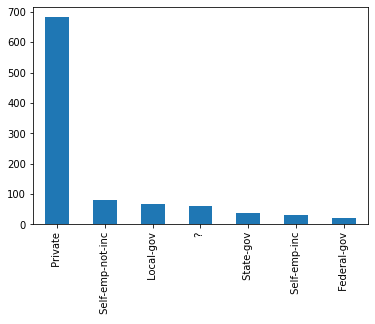

In [0]:
emp_data['employment_type'].value_counts().plot.bar()

# Inference 
 The number of employees are maximum in private employment type among all the employment type.

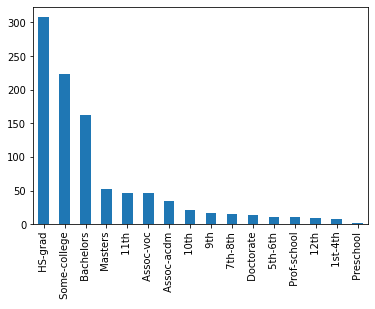

In [0]:
emp_data['education'].value_counts().plot.bar()

# Inference
The number of employees are maximum having HS-Grad education.

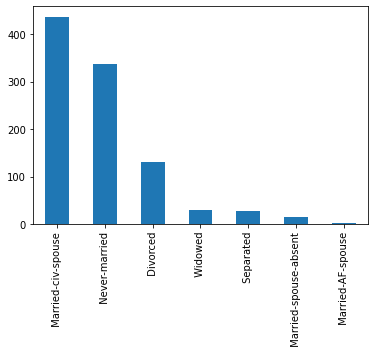

In [0]:
emp_data['marital-status'].value_counts().plot.bar()

# Inferences
The number of employees are maximum whose marital status is married-civ-spouse.

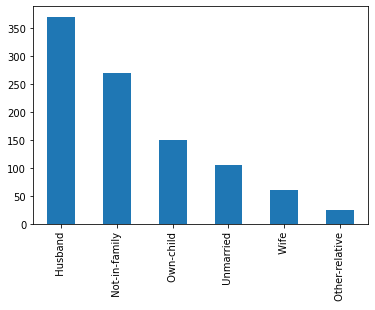

In [0]:
emp_data['relationship'].value_counts().plot.bar()

# Inference
The number of employees having husband relationship are maximum.

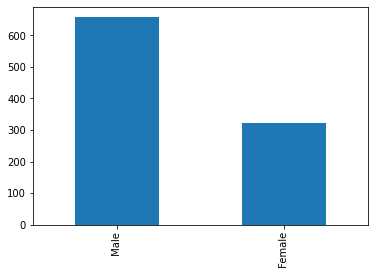

In [0]:
emp_data['Gender'].value_counts().plot.bar()

# Inference
The number of male employees are more than female employees.

***Histogram for Continuous Variables***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76bcfdce48>,
      dtype=object)

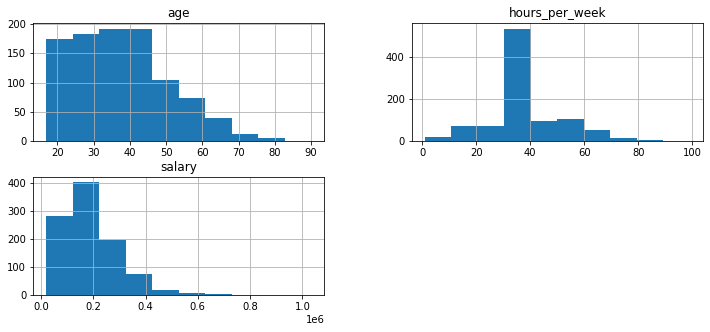

In [102]:
emp_data.hist(figsize=[12,5])

# Inferences
1. In univariate variable age, the number of employees are maximum whose age lies between 30 to 45.
2. In univariate variable hours_per_week, number are employees are maximum who works 30-40 hours per week.
3. In univariate variable salary, the highest salary range for the employees lies between 0.1 and 0.2.

### **Problem 3 - Show a bivariate analysis between Salary and hour_per_week.Choose a plot of your choice. Mention the inferences drawn.**



Text(0, 0.5, 'Salary')

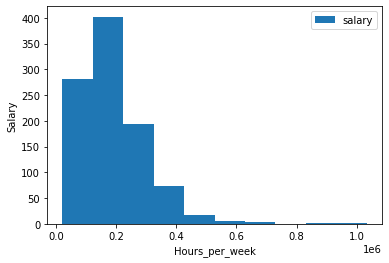

In [94]:
emp_data.plot.hist(x='hours_per_week', y='salary')
plt.xlabel('Hours_per_week')
plt.ylabel('Salary')

# **Inferences**
Salary is maximum when hours_per_week lies between 0.1 and 0.3 and after that with the increment of hours_per_week salary is *decreases*.

**Problem 4 - For each Education type , showcase the distribution of Salary .Use Seaborn Facetgrid & Line plot.Identify the key observations and mention them.**

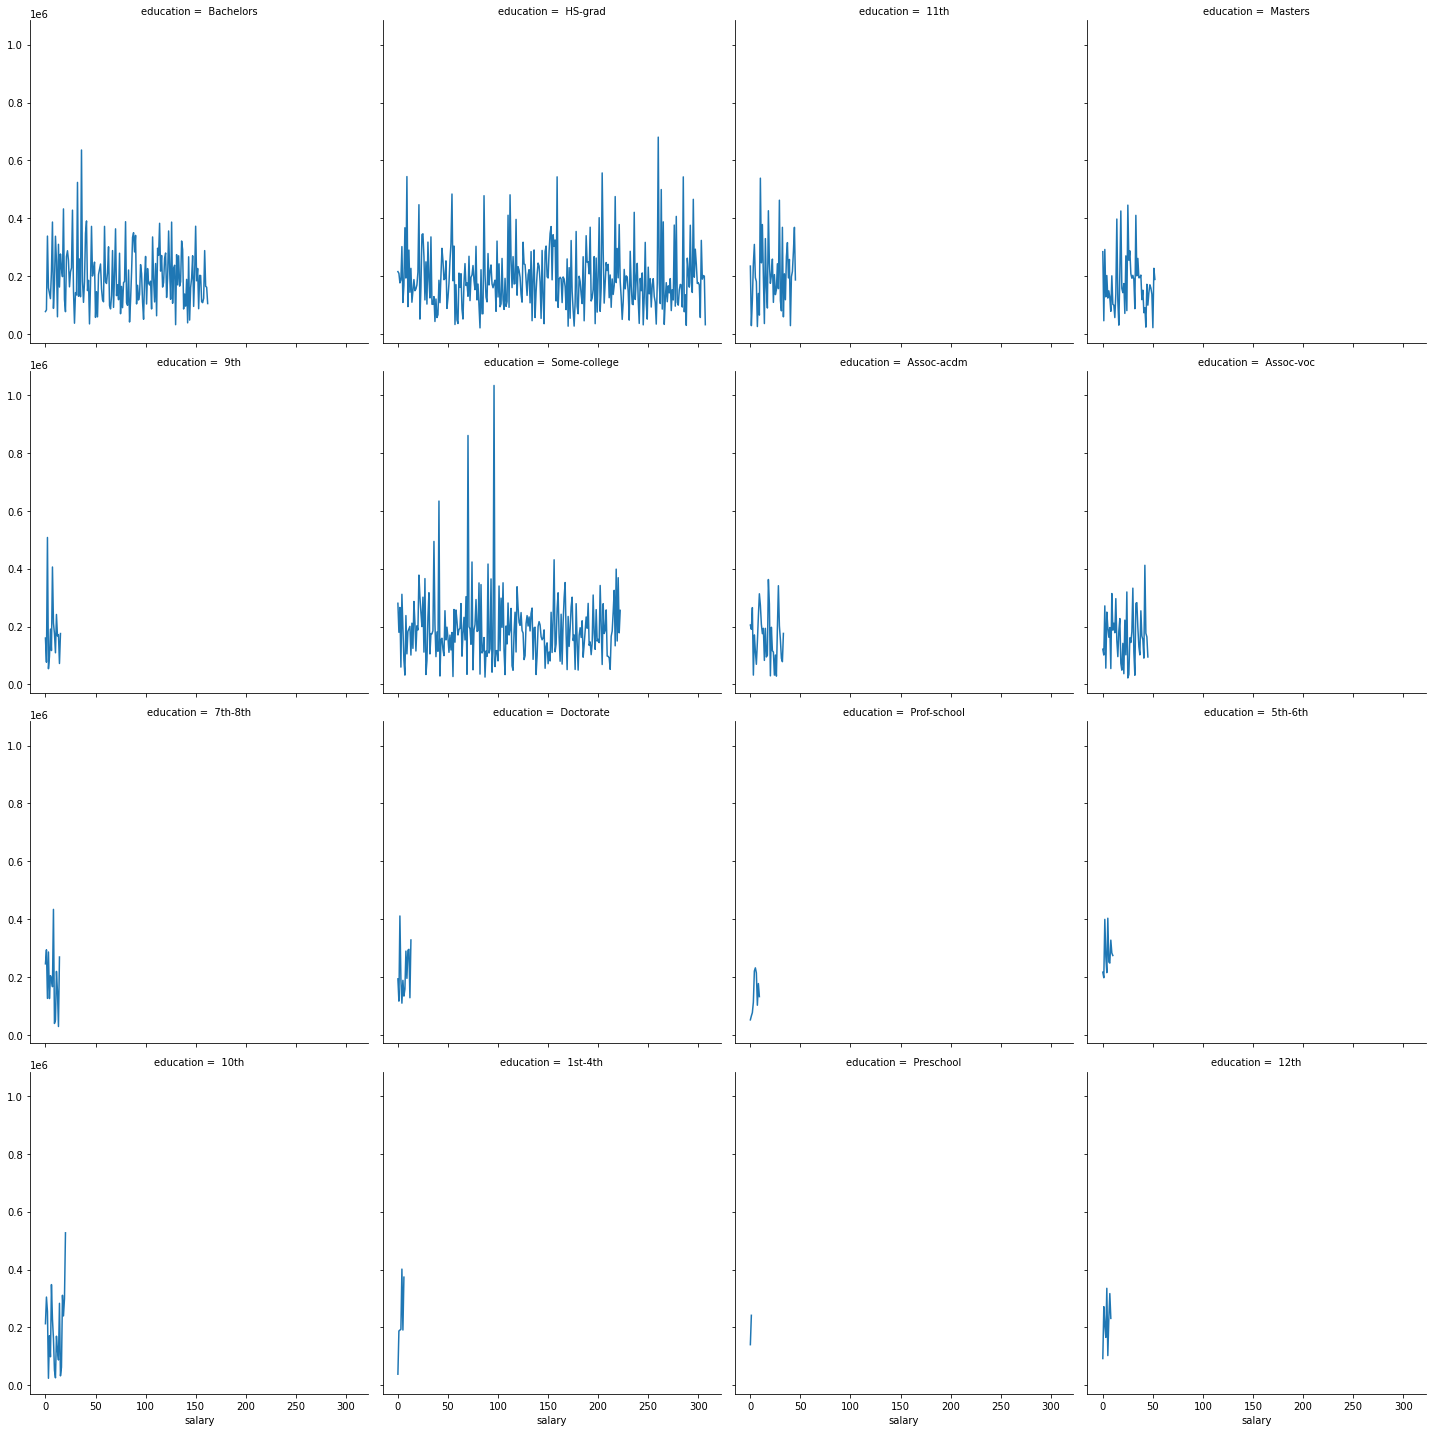

In [0]:
fn = sn.FacetGrid(emp_data, col = 'education',col_wrap = 4, height=5, aspect=1)
fn = fn.map(plt.plot,'salary')

# Inferences 
1.   Salary is continuous for education = HS-grad.
2.   Salary is increases till the particular extent and after that salary get decreases for the education type = some-college.
3.   Salary is minimum when education type is Preschool.

From the above graphs we can observe that salary increases for some extent and after that salary gets decreases and vice-versa in almost every education-type.

**Problem 5 - Categorizing each Gender & Relationship status (combination of all values) , plot the hours_per_week worked.Choose appropriate plots.Mention the inferences drawn.**

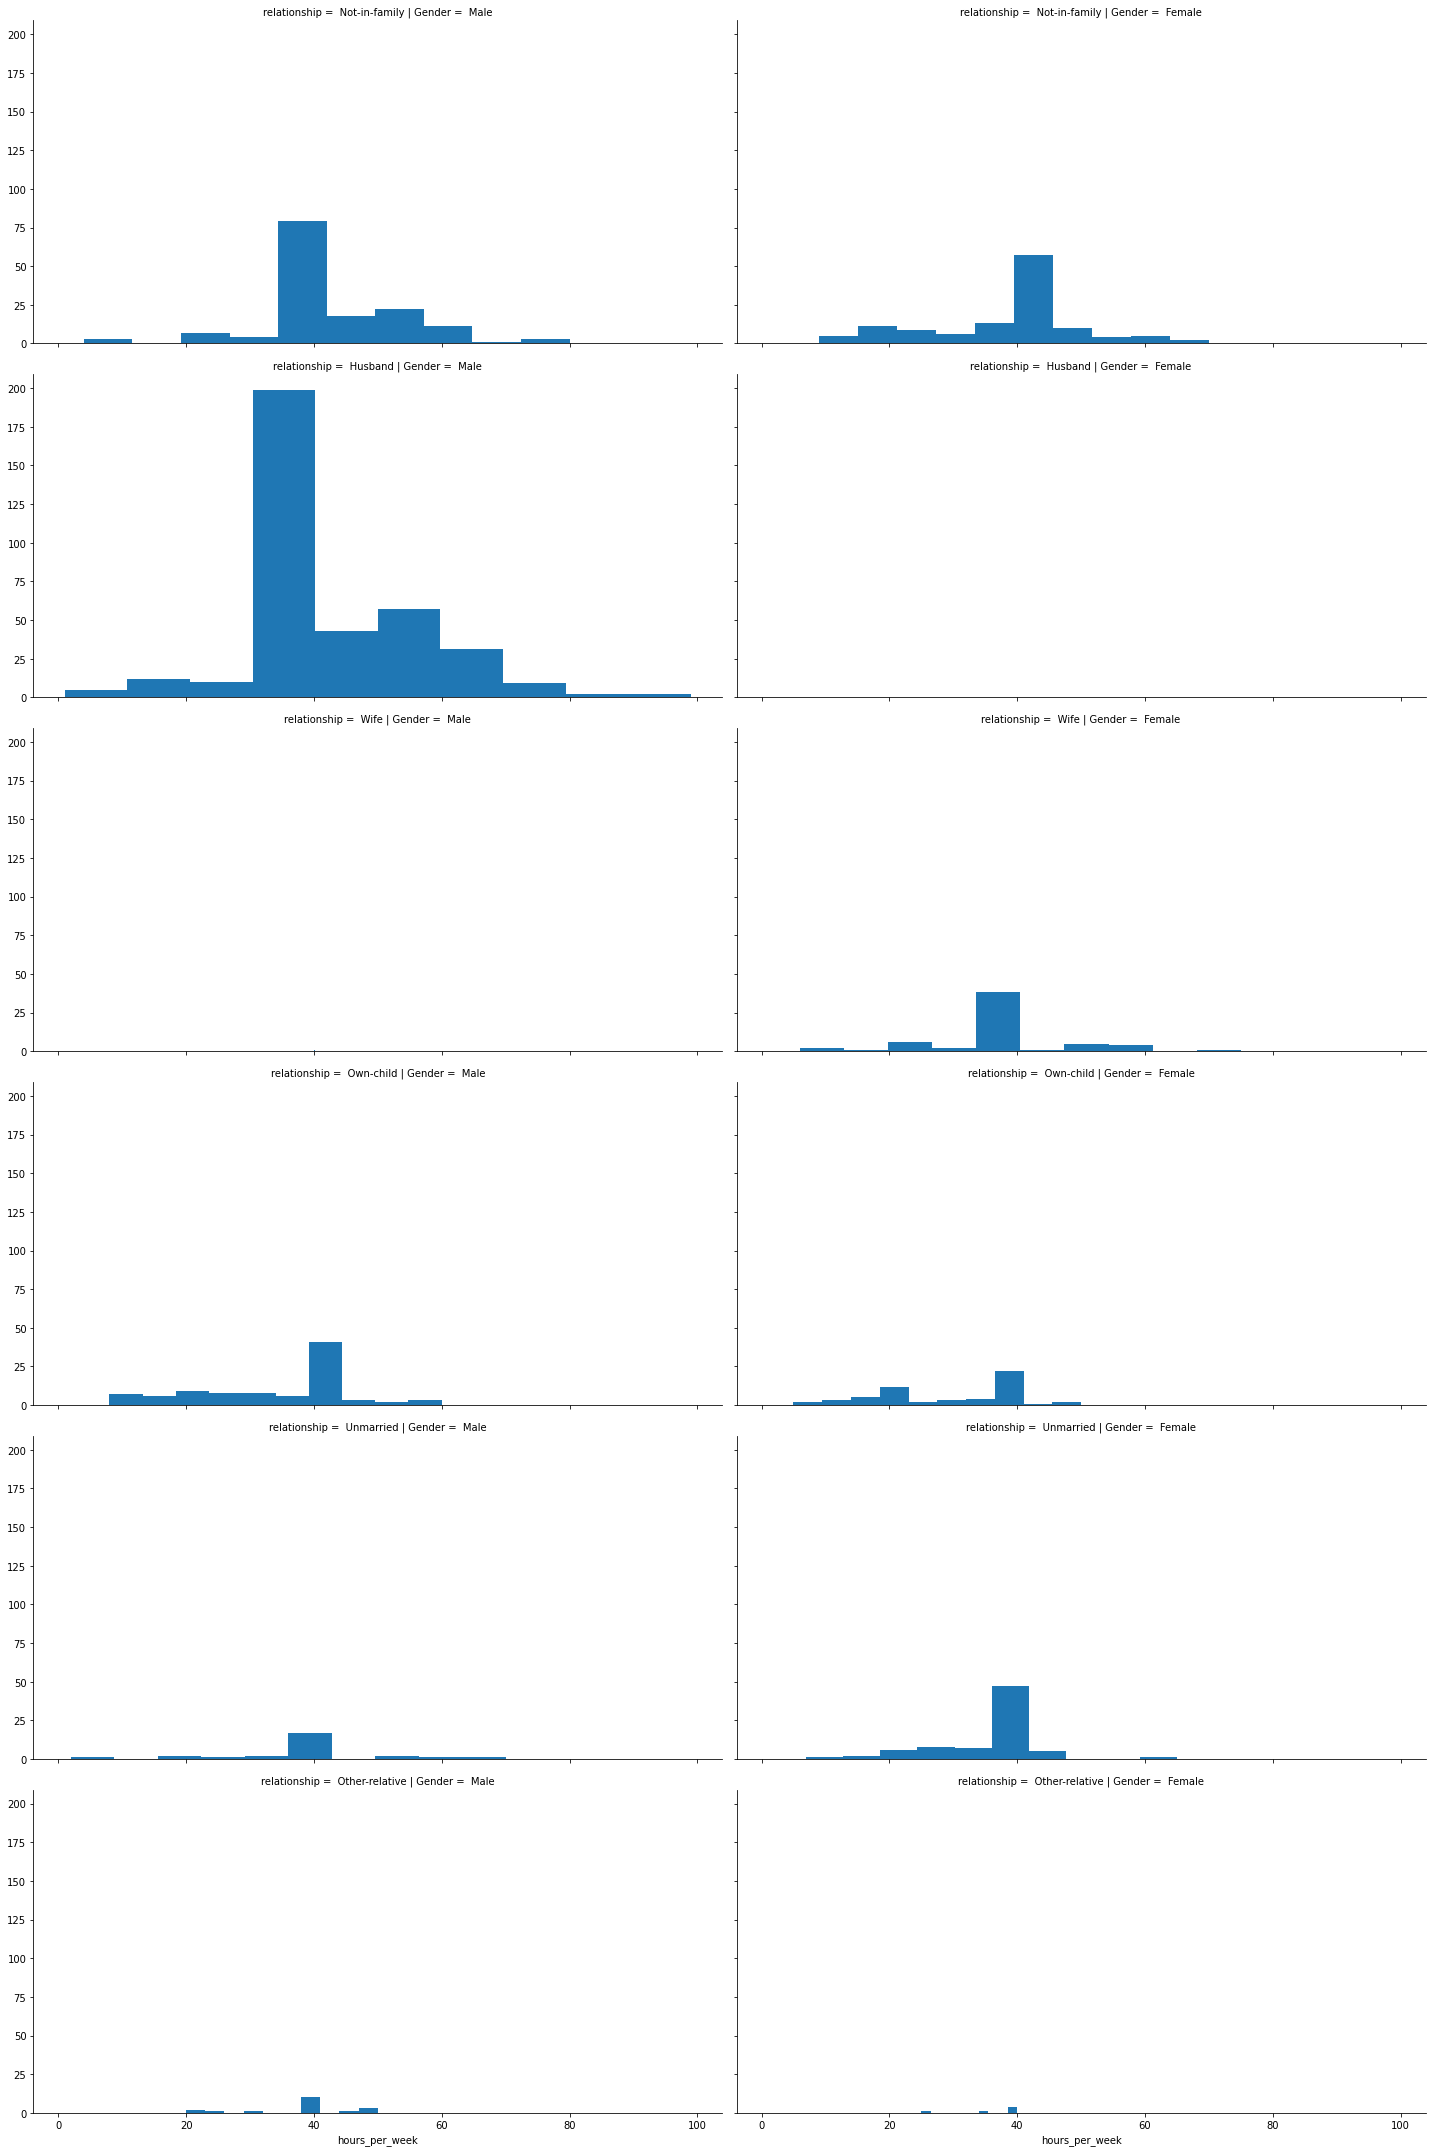

In [0]:
fn =sn.FacetGrid(emp_data,col='Gender',row='relationship',palette="GnBu_d",gridspec_kws={"width_ratios": [3,3]}, height=5,aspect=2)
fn = fn.map(plt.hist,'hours_per_week')

# Inferences 
1 - Hours_per_week for husband is higher when gender is male.
2 - Hours_per_week for wife is maximum when gender is female.
3 - Hours_per_week are maximum for unmarried individuals when gender is female as compared to male unmarried individual.

**Problem 6 - How many Males that have Marital status ‘Married-civ-spouse’ are earning above 150,000 ?**

In [0]:
emp_data[(emp_data['Gender'] == ' Male') & (emp_data['marital-status'] == ' Married-civ-spouse') & (emp_data.salary>150000)].count()[['Gender']]

Gender    226
dtype: int64

**Problem 7 - Are Divorced Individuals of higher age compared to Individuals that are Not-in-family ? Using mean as a measure , answer the above question & mention the respective age of the two groups.**

In [0]:
#Mean age of divorced individuals.
emp_data[(emp_data['marital-status'] == ' Divorced')].mean()[['age']]

age    42.030769
dtype: float64

In [0]:
#Mean age of individuals that are not-in-family.
emp_data[(emp_data['relationship'] == ' Not-in-family')].mean()[['age']]

age    37.485185
dtype: float64

In [0]:
#Respective age of Divorced individuals.
emp_data[(emp_data['marital-status'] == ' Divorced')][['age','marital-status']]

,age,marital-status
2,38,Divorced
19,43,Divorced
24,59,Divorced
28,39,Divorced
32,45,Divorced
...,...,...
948,43,Divorced
949,44,Divorced
957,33,Divorced
961,32,Divorced


In [0]:
#Respective age of individuals that are not-in-family.
emp_data[(emp_data['relationship'] == ' Not-in-family')][['age','relationship']]

,age,relationship
0,39,Not-in-family
2,38,Not-in-family
6,49,Not-in-family
8,31,Not-in-family
13,32,Not-in-family
...,...,...
969,36,Not-in-family
971,28,Not-in-family
972,67,Not-in-family
975,25,Not-in-family


The average age of divorced individuals is 42.030769 and the average age of individuals that are not-in-family is 37.485185. Therefore, the divorced individuals have higher age as compared to the individuals that are not-in-family.